<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [3]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [4]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [5]:
pox["date"] = pd.to_datetime(pox["date"], dayfirst=True)

In [6]:
pox.dtypes

date              datetime64[ns]
budapest_cases             int64
dtype: object

In [7]:
pox.head()

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


**Set the `'Date'` column to be the index**

In [8]:
pox.set_index("date",drop=True,inplace=True)

---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [9]:
pox.head(1)

,budapest_cases
date,
2005-01-03,168


In [10]:
pox.tail(1)

,budapest_cases
date,
2014-12-29,259


In [11]:
# First date in dataset is 2005-01-03.
# Last date in dataset is 2014-12-29.

**Plot a histogram of the Budapest cases column**

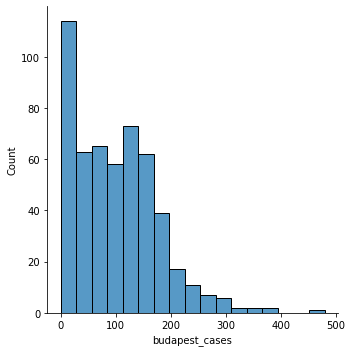

In [12]:
sns.displot(pox["budapest_cases"]);

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [13]:
yearlypox = pox.resample("Y")

In [14]:
yearlypox.agg(['sum', 'mean', 'min', 'max'])

budapest_cases                     
                      sum        mean min  max
date                                          
2005-12-31           4562   87.730769   5  174
2006-12-31           6498  124.961538   9  359
2007-12-31           6311  119.075472   4  385
2008-12-31           4441   85.403846   3  479
2009-12-31           5527  106.288462   2  304
2010-12-31           5222  100.423077   5  206
2011-12-31           5404  103.923077   4  333
2012-12-31           5353  101.000000   0  291
2013-12-31           5157   99.173077   6  283
2014-12-31           4375   84.134615   5  391

### Visualizations

**Make a line plot of chickenpox cases**

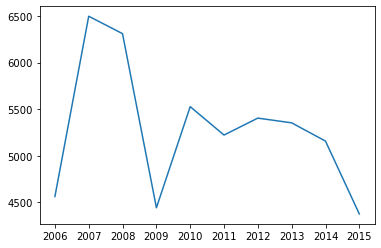

In [15]:
plt.plot(yearlypox.sum()); # Yearly Aggregated plot

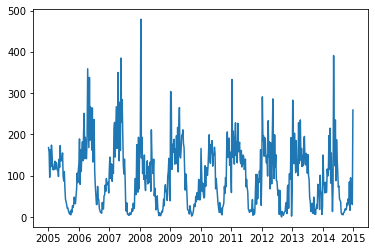

In [16]:
plt.plot(pox["budapest_cases"]); # Weekly Aggregated plot

**In short answer format, describe any apparent trends**

In [17]:
# There is likely to be seasonality for the chickenpox number.
# There could be a slightly downward trend.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

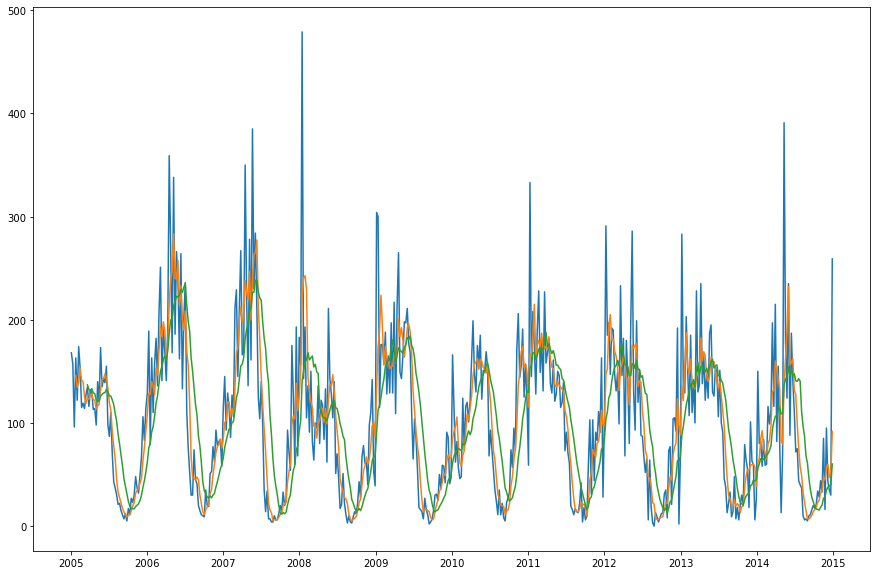

In [18]:
pox['4week_rolling_avg'] = pox["budapest_cases"].rolling(4).mean()
pox['12week_rolling_avg'] = pox["budapest_cases"].rolling(12).mean()
pox.dropna()
pox.head()

plt.figure(figsize=(15,10))
plt.plot(pox["budapest_cases"]);
plt.plot(pox["4week_rolling_avg"]);
plt.plot(pox["12week_rolling_avg"]);

In [19]:
#pox.head()

### Plot yearly chickenpox cases

You may need to use `resample` again for this.

In [20]:
#yearlypox.sum()

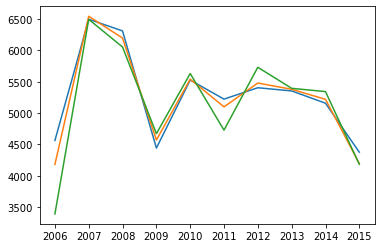

In [21]:
plt.plot(yearlypox.sum()["budapest_cases"]);
plt.plot(yearlypox.sum()["4week_rolling_avg"]);
plt.plot(yearlypox.sum()["12week_rolling_avg"]);